In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split    
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_auc_score
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Data preprocessing

In [2]:
f = pd.read_csv("clean_data.csv")
# f = f.set_index('encounter_id')
f = f.drop('readmitted.1',axis = 1)
#f.head()

In [3]:
if 'patient_nbr' in f.columns:
    f = f.drop(['patient_nbr'],axis = 1)
if 'encounter_id' in f.columns:
    f = f.drop(['encounter_id'],axis = 1)
scaler=preprocessing.RobustScaler()
scaled_data=scaler.fit(f)

### Without PCA

In [4]:
dataLabel=f['readmitted']
dataAttributes=f.drop(['readmitted'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(dataAttributes,dataLabel,test_size=0.20,random_state=100)
from sklearn.neighbors import KNeighborsClassifier  
clf = KNeighborsClassifier(n_neighbors=5)  
clf.fit(X_train, y_train)
predictions_train = clf.predict(X_train)
predictions_test = clf.predict(X_test)

In [5]:
print("Confusion Matrix for KNN on training dataset")
conf_matrix_train=confusion_matrix(y_train,predictions_train)
print(conf_matrix_train)
accuracy=accuracy_score(y_train, predictions_train)
f1_Score=f1_score(y_train, predictions_train, average='micro')
print("Accuracy of logit{}".format(accuracy))
print("F1 Score OF logit{}".format(f1_Score))

matrix_report=classification_report(y_train,predictions_train) 
print(matrix_report)

print("ROC", roc_auc_score(y_train,predictions_train))

Confusion Matrix for KNN on training dataset
[[71867   405]
 [ 8205   935]]
Accuracy of logit0.8942416351397828
F1 Score OF logit0.8942416351397828
             precision    recall  f1-score   support

          0       0.90      0.99      0.94     72272
          1       0.70      0.10      0.18      9140

avg / total       0.88      0.89      0.86     81412

ROC 0.5483468815110821


In [6]:
print("Confusion Matrix for KNN regression on Testing dataset")
conf_matrix_test=confusion_matrix(y_test,predictions_test)
print(conf_matrix_test)
accuracy=accuracy_score(y_test, predictions_test)
f1_Score=f1_score(y_test, predictions_test, average='micro')
print("Accuracy of logit{}".format(accuracy))
print("F1 Score OF logit {}".format(f1_Score))

matrix_report=classification_report(y_test,predictions_test) 
print(matrix_report)

print("ROC",roc_auc_score(y_test,predictions_test))

Confusion Matrix for KNN regression on Testing dataset
[[17901   236]
 [ 2145    72]]
Accuracy of logit0.8830205365038813
F1 Score OF logit 0.8830205365038813
             precision    recall  f1-score   support

          0       0.89      0.99      0.94     18137
          1       0.23      0.03      0.06      2217

avg / total       0.82      0.88      0.84     20354

ROC 0.5097321222930898


### With PCA

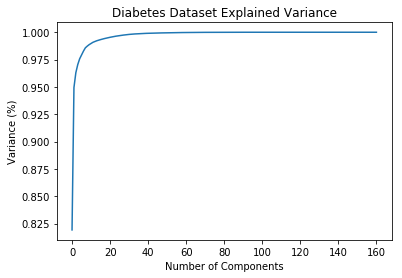

In [7]:
pca = PCA().fit(dataAttributes)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Diabetes Dataset Explained Variance')
plt.show()

In [8]:
pca = PCA(n_components=25)
dataset=pca.fit_transform(dataAttributes)
principalDf = pd.DataFrame(data = dataset)
finalDf = pd.concat([principalDf,dataLabel],axis = 1)
finalDf = pd.merge(principalDf,dataLabel.to_frame(),left_index=True, right_index=True,how = 'left')
finalDf

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,readmitted
0,-4.356064,-15.351343,-1.538056,-5.249537,-1.012339,0.376972,0.368505,0.313357,-0.243858,1.259823,...,0.195846,-0.079525,0.096506,-0.040133,-0.190267,-0.286241,0.141965,0.168267,-0.006165,0
1,15.949476,-0.552336,-2.036244,1.565729,-0.776021,-1.333743,-1.103734,-0.022671,0.078900,-0.278345,...,-0.396743,-0.188593,0.211676,-0.087900,0.237735,-0.303851,-0.062836,0.021456,-0.164381,0
2,-32.282711,1.345651,-1.086720,-1.226035,3.016284,2.333416,-0.192814,0.669144,-0.290865,-0.035305,...,-0.230873,1.365798,-0.049458,0.019938,0.326574,0.444534,-0.031629,-0.142071,-0.141851,0
3,0.762969,-0.603604,-2.490579,-0.199463,-0.147988,-0.733485,-0.632751,-0.056382,0.101290,-0.560031,...,-0.371786,-0.221316,0.161456,-0.118635,0.183024,-0.303478,-0.176724,-0.088961,-0.149045,0
4,6.575245,-9.612853,-2.164849,-0.225284,-1.701961,-0.354202,7.339412,1.082426,0.675889,-1.278871,...,-0.064315,1.044327,-0.042162,-0.358321,0.057263,-0.165153,-0.026694,-0.153063,-0.183071,0
5,-11.999560,1.910029,-0.868823,0.607769,5.037955,0.253630,-0.208141,-0.328913,0.080071,-0.736318,...,0.199472,-0.030814,-1.059206,0.200211,0.093282,-0.202660,-0.075549,0.535454,-0.028456,0
6,27.238734,1.003354,-2.252923,-0.895403,-0.393841,-0.829432,-0.652374,0.111767,0.100703,-0.943017,...,0.764865,-0.248411,0.558126,0.092416,-0.171358,-0.847695,0.068361,-0.269518,0.165207,0
7,29.108408,-8.057459,0.530628,0.891398,-0.696860,-0.952904,2.032715,0.538314,0.111151,0.133513,...,-0.690684,-0.457838,0.348385,0.250626,1.013448,0.623596,0.203687,0.227162,-0.202506,0
8,26.676943,9.635443,5.541282,-1.556682,-0.167587,-0.850997,-1.042916,0.258464,0.200042,-0.475692,...,0.025354,1.317792,-0.736337,0.353983,0.642162,-0.033474,-0.375027,-0.330881,-0.183388,0
9,-9.301586,4.811444,7.716984,-0.133104,0.782774,-0.331540,4.912045,0.912104,0.578894,-0.885609,...,0.256670,-0.127705,0.146239,-0.434921,-0.003859,-0.302907,0.233573,-0.099592,-0.542808,0


In [9]:
Label=finalDf['readmitted']
Attributes=finalDf.drop(['readmitted'],axis=1)

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(Attributes,Label,test_size=0.20,random_state=100)
#clf = LogisticRegression(random_state=0, solver='lbfgs').fit(X_train_1, y_train_1)
clf = KNeighborsClassifier(n_neighbors=5)  
clf.fit(X_train_1, y_train_1)
predictions_train = clf.predict(X_train_1)
predictions_test = clf.predict(X_test_1)

In [10]:
print("Confusion Matrix for KNN Regression on training dataset")
conf_matrix_train=confusion_matrix(y_train_1,predictions_train)
print(conf_matrix_train)
accuracy=accuracy_score(y_train_1, predictions_train)
f1_Score=f1_score(y_train_1, predictions_train, average='micro')
print("Accuracy of logit{}".format(accuracy))
print("F1 Score OF logit{}".format(f1_Score))

matrix_report=classification_report(y_train_1,predictions_train) 
print(matrix_report)

print("ROC",roc_auc_score(y_train_1,predictions_train))

Confusion Matrix for KNN Regression on training dataset
[[71831   441]
 [ 8243   897]]
Accuracy of logit0.8933326782292537
F1 Score OF logit0.8933326782292537
             precision    recall  f1-score   support

          0       0.90      0.99      0.94     72272
          1       0.67      0.10      0.17      9140

avg / total       0.87      0.89      0.86     81412

ROC 0.5460190477839855


In [11]:
print("Confusion Matrix for KNN regression on Testing dataset")
conf_matrix_test=confusion_matrix(y_test_1,predictions_test)
print(conf_matrix_test)
accuracy=accuracy_score(y_test_1, predictions_test)
f1_Score=f1_score(y_test_1, predictions_test, average='micro')
print("Accuracy of logit{}".format(accuracy))
print("F1 Score OF logit {}".format(f1_Score))

matrix_report=classification_report(y_test_1,predictions_test) 
print(matrix_report)

print("ROC",roc_auc_score(y_test_1,predictions_test))

Confusion Matrix for KNN regression on Testing dataset
[[17897   240]
 [ 2137    80]]
Accuracy of logit0.8832170580721234
F1 Score OF logit 0.8832170580721234
             precision    recall  f1-score   support

          0       0.89      0.99      0.94     18137
          1       0.25      0.04      0.06      2217

avg / total       0.82      0.88      0.84     20354

ROC 0.5114260904369686
